# Run simple dermal model with dermal daily dosing

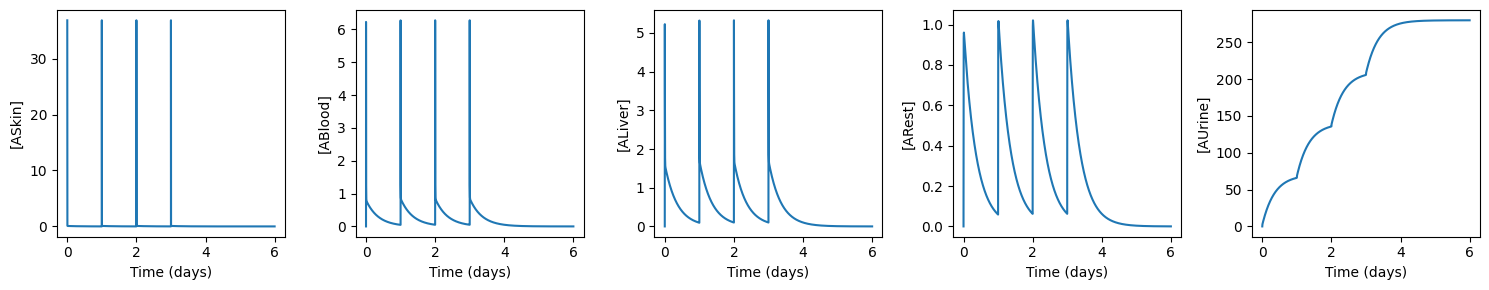

In [1]:
import math
import tellurium as te
import matplotlib.pyplot as plt

fn_ant = './simple_dermal.ant'

# Specify the input
input_id = 'ASkin'

# BW and dosing
bw = 70
daily_intake = 1 * bw
days_of_exposure = 4
days_after_exposure = 2

# Output evaluation resolution (minutes)
evaluation_resolution = 3600

# Load the PBPK model from the SBML file
rr_model = te.loada(fn_ant)

# Set physiological parameters
rr_model.BW = bw

# Create a repeating daily oral dosing
event_id = f"dermal_daily_exposure"
rr_model.addEvent(event_id, False, f"time % 24 == 0 && time < {24 * days_of_exposure}", False)
rr_model.addEventAssignment(event_id, input_id, f"{input_id} + {daily_intake}", False)
rr_model.regenerateModel(True, True)

# Simulate the PBPK model
num_days = days_of_exposure + days_after_exposure
results = rr_model.simulate(0, 24 * num_days, evaluation_resolution * 24 * num_days + 1)

# Helper function for plotting simulation results
def plotSimulationResults(res, selections, ncols=5):
    nrows = math.ceil((len(selections) - 1)/ncols)
    fig, axes = plt.subplots(nrows, ncols, figsize=(3*ncols, 3*nrows))
    axes = axes.flatten()
    for ax in axes:
        ax.set(xlabel='Time (days)') 
    labels = selections
    for i in range(1, len(selections)):
        sid = selections[i]
        axes[i-1].plot(res['time'] / 24, res[sid])
        axes[i-1].set(ylabel=labels[i])
    for j in range(len(selections), nrows*ncols + 1):
        fig.delaxes(axes[j-1])
    fig.tight_layout()

# Plot the results
plotSimulationResults(results, rr_model.timeCourseSelections)